# Guide for Authors

In [1]:
print('Welcome to "The Fuzzing Book"!')

Welcome to "The Fuzzing Book"!


This notebook compiles the most important conventions for all chapters (notebooks) of "The Fuzzing Book".

## Organization of this Book

### Chapters  as Notebooks

Each chapter comes in its own _Jupyter notebook_.  A single notebook (= a chapter) should cover the material (text and code, possibly slides) for a 90-minute lecture.

A chapter notebook should be named `Topic.ipynb`, where `Topic` is the topic.  `Topic` must be usable as a Python module and should characterize the main contribution.  If the main contribution of your chapter is a class `FooFuzzer`, for instance, then your topic (and notebook name) should be `FooFuzzer`, such that users can state

```python
from FooFuzzer import FooFuzzer
```

Since class and module names should start with uppercase letters, all non-notebook files and folders start with lowercase letters. this may make it easier to differentiate them.  The special notebook `index.ipynb` gets converted into the home pages `index.html` (on fuzzingbook.org) and `README.md` (on GitHub).

Notebooks are stored in the `notebooks` folder.

### Output Formats

The notebooks by themselves can be used by instructors and students to toy around with.  They can edit code (and text) as they like and even run them as a slide show.

The notebook can be _exported_ to multiple (non-interactive) formats:

* HTML – for placing this material online.
* PDF – for printing
* Python – for coding
* Slides – for presenting

The included Makefile can generate all of these automatically (and a few more).

At this point, we mostly focus on HTML and Python, as we want to get these out quickly; but you should also occasionally ensure that your notebooks can (still) be exported into PDF.  Other formats (Word, Markdown) are experimental.

## Sites

All sources for the book end up on the [Github project page](https://github.com/uds-se/fuzzingbook).  This holds the sources (notebooks), utilities (Makefiles), as well as an issue tracker.

The derived material for the book ends up in the `docs/` folder, from where it is eventually pushed to the [fuzzingbook website](http://www.fuzzingbook.org/).  This site allows to read the chapters online, can launch Jupyter notebooks using the binder service, and provides access to code and slide formats.  Use `make publish` to create and update the site.

### The Book PDF

The book PDF is compiled automatically from the individual notebooks.  Each notebook becomes a chapter; references are compiled in the final chapter.  Use `make book` to create the book.

## Creating and Building

### Tools you will need

To work on the notebook files, you need the following:

1. Jupyter notebook.  The easiest way to install this is via the [Anaconda distribution](https://www.anaconda.com/download/).

2. Once you have the Jupyter notebook installed, you can start editing and coding right away by starting `jupyter notebook` (or `jupyter lab`) in the topmost project folder.

3. If (like me) you don't like the Jupyter Notebook interface, I recommend [Jupyter Lab](https://jupyterlab.readthedocs.io/en/stable/), the designated successor to Jupyter Notebook.  Invoke it as `jupyter lab`.  It comes with a much more modern interface, but misses autocompletion and a couple of extensions.  I am running it [as a Desktop application](http://christopherroach.com/articles/jupyterlab-desktop-app/) which gets rid of all the browser toolbars.
On the Mac, there is also the [Pineapple app](https://nwhitehead.github.io/pineapple/), which integrates a nice editor with a local server.  This is easy to use, but misses a few features; also, it hasn't seen updates since 2015.

4. To create the entire book (with citations, references, and all), you also need the [ipybublish](https://github.com/chrisjsewell/ipypublish) package.  This allows you to create the HTML files, merge multiple chapters into a single PDF or HTML file, create slides, and more.  The Makefile provides the essential tools for creation.


### Version Control

We use git in a single strand of revisions.  Feel free branch for features, but eventually merge back into the main "master" branch. Sync early; sync often.  Only push if everything ("make all") builds and passes.

The Github repo thus will typically reflect work in progress.  If you reach a stable milestone, you can push things on the fuzzingbook.org web site, using `make publish`.

#### nbdime

The [nbdime](https://github.com/jupyter/nbdime) package gives you tools such as `nbdiff` (and even better, `nbdiff-web`) to compare notebooks against each other; this ensures that cell _contents_ are compared rather than the binary format.

`nbdime config-git --enable` integrates nbdime with git such that `git diff` runs the above tools; merging should also be notebook-specific.

#### nbstripout

Notebooks in version control _should not contain output cells,_ as these tend to change a lot.  (Hey, we're talking random output generation here!)  To have output cells automatically stripped during commit, install the [nbstripout](https://github.com/kynan/nbstripout) package and use

```
nbstripout --install
```

to set it up as a git filter.  The `notebooks/` folder comes with a `.gitattributes` file already set up for `nbstripout`, so you should be all set.

Note that _published_ notebooks (in short, anything under the `docs/` tree _should_ have their output cells included, such that users can download and edit notebooks with pre-rendered output.  This folder contains a `.gitattributes` file that should explicitly disable `nbstripout`, but it can't hurt to check.

As an example, the following cell 

1. _should_ have its output included in the [HTML version of this guide](https://www.fuzzingbook.org/beta/html/Guide_for_Authors.html);
2. _should not_ have its output included in [the git repo](https://github.com/uds-se/fuzzingbook/blob/master/notebooks/Guide_for_Authors.ipynb) (`notebooks/`);
3. _should_ have its output included in [downloadable and editable notebooks](https://github.com/uds-se/fuzzingbook/blob/master/docs/beta/notebooks/Guide_for_Authors.ipynb) (`docs/notebooks/` and `docs/beta/notebooks/`).

In [2]:
import random

In [3]:
random.random()

0.5661149121555685

### Inkscape and GraphViz

Creating derived files uses  [Inkscape](https://inkscape.org/en/) and [Graphviz](https://www.graphviz.org/) – through its [Python wrapper](https://pypi.org/project/graphviz/) – to process  SVG images. These tools are not automatically installed, but are available on pip, _brew_ and _apt-get_ for all major distributions.

### LaTeX Fonts

By default, creating PDF uses XeLaTeX with a couple of special fonts, which you can find in the `fonts/` folder; install these fonts system-wide to make them accessible to XeLaTeX.

You can also run `make LATEX=pdflatex` to use `pdflatex` and standard LaTeX fonts instead.

### Creating Derived Formats (HTML, PDF, code, ...)

The [Makefile](../Makefile) provides rules for all targets.  Type `make help` for instructions.

The Makefile should work with GNU make and a standard Jupyter Notebook installation.  To create the multi-chapter book and BibTeX citation support, you need to install the  [iPyPublish](https://github.com/chrisjsewell/ipypublish) package (which includes the `nbpublish` command).

### Creating a New Chapter

To create a new chapter for the book,

1. Set up a new `.ipynb` notebook file as copy of [Template.ipynb](Template.ipynb).
2. Include it in the `CHAPTERS` list in the `Makefile`.
3. Add it to the git repository.

## Teaching a Topic

Each chapter should be devoted to a central concept and a small set of lessons to be learned.  I recommend the following structure:

* Introduce the problem ("We want to parse inputs")
* Illustrate it with some code examples ("Here's some input I'd like to parse")
* Develop a first (possibly quick and dirty) solution ("A PEG parser is short and often does the job"_
* Show that it works and how it works ("Here's a neat derivation tree.  Look how we can use this to mutate and combine expressions!")
* Develop a second, more elaborated solution, which should then become the main contribution.  ("Here's a general LR(1) parser that does not require a special grammar format.  (You can skip it if you're not interested)")
* Offload non-essential extensions to later sections or to exercises.  ("Implement a universal parser, using the Dragon Book")

The key idea is that readers should be able to grasp the essentials of the problem and the solution in the beginning of the chapter, and get further into details as they progress through it.  Make it easy for readers to be drawn in, providing insights of value quickly.  If they are interested to understand how things work, they will get deeper into the topic.  If they just want to use the technique (because they may be more interested in later chapters), having them read only the first few examples should be fine for them, too.

Whatever you introduce should be motivated first, and illustrated after.  Motivate the code you'll be writing, and use plenty of examples to show what the code just introduced is doing.  Remember that readers should have fun interacting with your code and your examples.  Show and tell again and again and again.

## Coding

### Set up

The first code block in each notebook should be

In [4]:
import fuzzingbook_utils

This sets up stuff such that notebooks can import each other's code (see below). This import statement is removed in the exported Python code, as the .py files would import each other directly.

Importing `fuzzingbook_utils` also sets a fixed _seed_ for random number generation.  This way, whenever you execute a notebook from scratch (restarting the kernel), you get the exact same results; these results will also end up in the derived HTML and PDF files.  (If you run a notebook or a cell for the second time, you will get more random results.)

### Coding Style and Consistency

Here's a few rules regarding coding style.

#### Use Python 3

We use Python 3 (specifically, Python 3.6) for all code.  If you can, try to write code that can be easily backported to Python 2.

#### Follow Python Coding Conventions

We use _standard Python coding conventions_ according to [PEP 8](https://www.python.org/dev/peps/pep-0008/).

Your code must pass the `pycodestyle` style checks which you get by invoking `make style`.  A very easy way to meet this goal is to invoke `make reformat`, which reformats all code accordingly.  The `code prettify` notebook extension also allows you to automatically make your code (mostly) adhere to PEP 8.

#### One Cell per Definition

Use one cell for each definition or example.  During importing, this makes it easier to decide which cells to import (see below).

#### Identifiers

In the book, this is how we denote `variables`, `functions()` and `methods()`, `Classes`, `Notebooks`, `variables_and_constants`, `EXPORTED_CONSTANTS`, `files`, `folders/`, and `<grammar-elements>`.

#### Quotes

If you have the choice between quoting styles, prefer 
* double quotes (`"strings"`) around strings that are used for interpolation or that are natural language messages, and 
* single quotes (`'characters'`) for single characters and formal language symbols that a end user would not see.

#### Read More

Beyond simple syntactical things, here's a [very nice guide](https://docs.python-guide.org/writing/style/) to get you started writing "pythonic" code.

### Importing Code from Notebooks

To import the code of individual notebooks, you can import directly from .ipynb notebook files.

In [5]:
from Fuzzer import fuzzer

In [6]:
fuzzer(100, ord('0'), 10)

'050199092904721615267546627640773972382632848750065259698551700448752187153'

**Important**: When importing a notebook, the module loader will **only** load cells that start with

* a function definition (`def`)
* a class definition (`class`)
* a variable definition if all uppercase (`ABC = 123`)
* `import` and `from` statements

All other cells are _ignored_ to avoid recomputation of notebooks and clutter of `print()` output.

Exported Python code will import from the respective .py file instead.  The exported Python code is set up such that only the above items will be imported.

If importing a module prints out something (or has other side effects), that is an error.  Use `make check-imports` to check whether your modules import without output.

Import modules only as you need them, such that you can motivate them well in the text.

### Imports and Dependencies

Try to depend on as few other notebooks as possible.  This will not only ease construction and reconstruction of the code, but also reduce requirements for readers, giving then more flexibility in navigating through the book.

When you import a notebook, this will show up as a dependency in the [Sitemap](00_Table_of_Contents.ipynb).  If the imported module is not critical for understanding, and thus should not appear as a dependency in the sitemap, mark the import as "minor dependency" as follows:

In [7]:
from Reducer import DeltaDebuggingReducer  # minor dependency

### Design and Architecture

Stick to simple functions and data types.  We want our readers to focus on functionality, not Python.  You are encouraged to write in a "pythonic" style, making use of elegant Python features such as list comprehensions, sets, and more; however, if you do so, be sure to explain the code such that readers familiar with, say, C or Java can still understand things.

### Incomplete Examples

When introducing examples for students to complete, use the ellipsis `...` to indicate where students should add code, as in here:

In [8]:
def student_example():
    x = some_value()
    # Now, do something with x
    ...

The ellipsis is legal code in Python 3.  (Actually, it is an `Ellipsis` object.)

### Introducing Classes

Defining _classes_ can be a bit tricky, since all of a class must fit into a single cell.  This defeats the incremental style preferred for notebooks.  By defining a class _as a subclass of itself_, though, you can avoid this problem.

Here's an example.  We introduce a class `Foo`:

In [9]:
class Foo:
    def __init__(self):
        pass

    def bar(self):
        pass

Now we could discuss what `__init__()` and `bar()` do, or give an example of how to use them:

In [10]:
f = Foo()
f.bar()

We now can introduce a new `Foo` method by subclassing from `Foo` into a class which is _also_ called `Foo`:

In [11]:
class Foo(Foo):
    def baz(self):
        pass

This is the same as if we had subclassed `Foo` into `Foo_1` with `Foo` then becoming an alias for `Foo_1`.  The original `Foo` class is overshadowed by the new one:

In [12]:
new_f = Foo()
new_f.baz()

Note, though, that _existing_ objects keep their original class:

In [13]:
from ExpectError import ExpectError

In [14]:
with ExpectError():
    f.baz()

Traceback (most recent call last):
  File "<ipython-input-14-19c0eadbd4d4>", line 2, in <module>
    f.baz()
AttributeError: 'Foo' object has no attribute 'baz' (expected)


## Helpers

There's a couple of notebooks with helpful functions, including [Timer](Timer.ipynb), [ExpectError and ExpectTimeout](ExpectError.ipynb).  Also check out the [Coverage](Coverage.ipynb) class.

### Quality Assurance

In your code, make use of plenty of assertions that allow to catch errors quickly.  These assertions also help your readers understand the code.

### Issue Tracker

The [Github project page](https://github.com/uds-se/fuzzingbook) allows to enter and track issues.

## Writing Text

Text blocks use Markdown syntax.  [Here is a handy guide](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).


### Sections

Any chapter notebook must begin with `# TITLE`, and sections and subsections should then follow by `## SECTION` and `### SUBSECTION`.

Sections should start with their own block, to facilitate cross-referencing.


### Highlighting

Use

* _emphasis_ (`_emphasis_`) for highlighting,
* *emphasis* (`*emphasis*`) for highlighting terms that will go into the index,
* `backticks` for code and other verbatim elements.

### Hyphens and Dashes

Use "–" for em-dashes, "-" for hyphens, and "$-$" for minus.

### Quotes

Use standard typewriter quotes (`"quoted string"`) for quoted text.  The PDF version will automatically convert these to "smart" (e.g. left and right) quotes.

### Lists and Enumerations

You can use bulleted lists:

* Item A
* Item B

and enumerations:

1. item 1
1. item 2

For description lists, use a combination of bulleted lists and highlights:

* **PDF** is great for reading offline
* **HTML** is great for reading online



### Math

LaTeX math formatting works, too.

`$x = \sum_{n = 1}^{\infty}\frac{1}{n}$` gets you
$x = \sum_{n = 1}^{\infty}\frac{1}{n}$.


### Inline Code

Python code normally goes into its own cells, but you can also have it in the text:

```python
s = "Python syntax highlighting"
print(s)
```

### Images

To insert images, use Markdown syntax `![Word cloud](PICS/wordcloud.png){width=100%}` inserts a picture from the `PICS` folder.

![Word cloud](PICS/wordcloud.png){width=100%}

All pictures go to `PICS/`, both in source as well as derived formats; both are stored in git, too.  (Not all of us have all tools to recreate diagrams, etc.)

### Footnotes

Markdown supports footnotes, as in [^footnote].  These are rendered as footnotes in HTML and PDF, _but not within Jupyter_; hence, readers may find them confusing.  So far, the book makes no use of footnotes, and uses parenthesized text instead.

[^footnote]: Test, [Link](https://www.fuzzingbook.org).

### Floating Elements and References

\todo[inline]{I haven't gotten this to work yet -- AZ}

To produce floating elements in LaTeX and PDF, edit the metadata of the cell which contains it. (In the Jupyter Notebook Toolbar go to View -> Cell Toolbar -> Edit Metadata and a button will appear above each cell.) This allows you to control placement and create labels.

#### Floating Figures

Edit metadata as follows:

```json
{
"ipub": {
  "figure": {
    "caption": "Figure caption.",
    "label": "fig:flabel",
    "placement": "H",
	"height":0.4,
    "widefigure": false,
    }
  }
}
```

- all tags are optional
- height/width correspond to the fraction of the page height/width, only one should be used (aspect ratio will be maintained automatically)
- `placement` is optional and constitutes using a placement arguments for the figure (e.g. \begin{figure}[H]). See [Positioning_images_and_tables](https://www.sharelatex.com/learn/Positioning_images_and_tables).
- `widefigure` is optional and constitutes expanding the figure to the page width (i.e. \begin{figure*}) (placement arguments will then be ignored)


#### Floating Tables

For  **tables** (e.g. those output by `pandas`), enter in cell metadata:

```json
{
"ipub": {
     "table": {
	    "caption": "Table caption.",
	    "label": "tbl:tlabel",
	    "placement": "H",
            "alternate": "gray!20"
	  }
   }
}
```

- `caption` and `label` are optional
- `placement` is optional and constitutes using a placement arguments for the table (e.g. \begin{table}[H]). See [Positioning_images_and_tables](https://www.sharelatex.com/learn/Positioning_images_and_tables).
- `alternate` is optional and constitutes using alternating colors for the table rows (e.g. \rowcolors{2}{gray!25}{white}). See (https://tex.stackexchange.com/a/5365/107738)[https://tex.stackexchange.com/a/5365/107738].
- if tables exceed the text width, in latex, they will be shrunk to fit 


#### Floating Equations

For  **equations** (e.g. those output by `sympy`), enter in cell metadata:

```json
{
  "ipub": {
	  "equation": {
        "environment": "equation",
	    "label": "eqn:elabel"
	  }
  }
}
```

- environment is optional and can be 'none' or any of those available in [amsmath](https://www.sharelatex.com/learn/Aligning_equations_with_amsmath); 'equation', 'align','multline','gather', or their \* variants. Additionaly, 'breqn' or 'breqn\*' will select the experimental [breqn](https://ctan.org/pkg/breqn) environment to *smart* wrap long equations. 
- label is optional and will only be used if the equation is in an environment


#### References

To reference a floating object, use `\cref`, e.g. \cref{eq:texdemo}



### Cross-Referencing

####  Section References

* To refer to sections in the same notebook, use the header name as anchor, e.g. 
`[Code](#Code)` gives you [Code](#Code).  For multi-word titles, replace spaces by hyphens (`-`), as in [Using Notebooks as Modules](#Using-Notebooks-as-Modules).

* To refer to cells (e.g. equations or figures), you can define a label as cell metadata.  See [Floating Elements and References](#Floating-Elements-and-References) for details.

* To refer to other notebooks, use a Markdown cross-reference to the notebook file, e.g. [the "Fuzzing" chapter](Fuzzer.ipynb).  A special script will be run to take care of these links.  Reference chapters by name, not by number.

### Citations

To cite papers, cite in LaTeX style.  The text

In [15]:
print(r"\cite{Purdom1972}")

\cite{Purdom1972}


is expanded to \cite{Purdom1972}, which in HTML and PDF should be a nice reference.
The keys refer to BibTeX entries in [fuzzingbook.bib](fuzzingbook.bib).  
* LaTeX/PDF output will have a "References" section appended.
* HTML output will link to the URL field from the BibTeX entry. Be sure it points to the DOI.

### Todo's

* To mark todo's, use `\todo{Thing to be done}.`  \todo{Expand this}

### Tables

Tables with fixed contents can be produced using Markdown syntax:

| Tables | Are | Cool |
| ------ | ---:| ----:|
| Zebra  | 2   |   30 |
| Gnu    | 20  |  400 |


If you want to produce tables from Python data, the `PrettyTable` package (included in the book) allows to [produce tables with LaTeX-style formatting.](http://blog.juliusschulz.de/blog/ultimate-ipython-notebook)

In [16]:
from fuzzingbook_utils import PrettyTable as pt

In [17]:
import numpy as np

In [18]:
data = np.array([[1, 2, 30], [2, 3, 400]])
pt.PrettyTable(data, [r"$\frac{a}{b}$", r"$b$",
                      r"$c$"], print_latex_longtable=False)

$\frac{a}{b}$,$b$,$c$
1,2,30
2,3,400


### Plots and Data

It is possible to include plots in notebooks.  Here is an example of plotting a function:

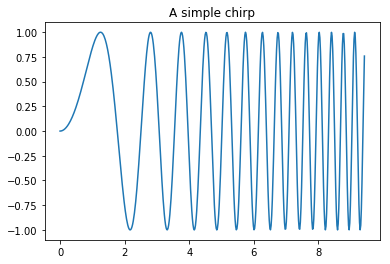

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt

x = np.linspace(0, 3 * np.pi, 500)
plt.plot(x, np.sin(x ** 2))
plt.title('A simple chirp');

And here's an example of plotting data:

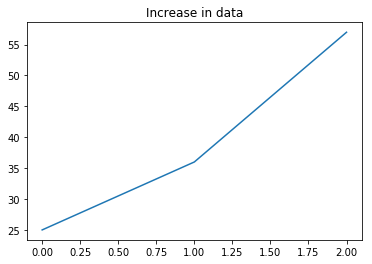

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
data = [25, 36, 57]
plt.plot(data)
plt.title('Increase in data');

Plots are available in all derived versions (HTML, PDF, etc.)  Plots with `plotly` are even nicer (and interactive, even in HTML),  However, at this point, we cannot export them to PDF, so `matplotlib` it is.

## Slides

You can set up the notebooks such that they also can be presented as slides.  In the browser, select View -> Cell Toolbar -> Slideshow.  You can then select a slide type for each cell:

* `New slide` starts a new slide with the cell (typically, every `## SECTION` in the chapter)
* `Sub-slide` starts a new sub-slide which you navigate "down" to (anything in the section)
* `Fragment` is a cell that gets revealed after a click (on the same slide)
* `Skip` is skipped during the slide show (e.g. `import` statements; navigation guides)
* `Notes` goes into presenter notes

To create slides, do `make slides`; to view them, change into the `slides/` folder and open the created HTML files.  (The `reveal.js` package has to be in the same folder as the slide to be presented.)

The ability to use slide shows is a compelling argument for teachers and instructors in our audience.

(Hint: In a slide presentation, type `s` to see presenter notes.)

## Writing Tools

When you're editing in the browser, you may find these extensions helpful:

### Jupyter Notebook

[Jupyter Notebook Extensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions) is a collection of productivity-enhancing tools (including spellcheckers).

I found these extensions to be particularly useful:

  * Spell Checker (while you're editing)
  
  * Table of contents (for quick navigation)

  * Code prettify (to produce "nice" syntax)
  
  * Codefolding
  
  * Live Markdown Preview (while you're editing)

### Jupyter Lab

Extensions for _Jupyter Lab_ are much less varied and less supported, but things get better. I am running

  * [Spell Checker](https://github.com/ijmbarr/jupyterlab_spellchecker)
  
  * [Table of Contents](https://github.com/jupyterlab/jupyterlab-toc)
 

## Interaction

It is possible to include interactive elements in a notebook, as in the following example:

```python
try:
    from ipywidgets import interact, interactive, fixed, interact_manual

    x = interact(fuzzer, char_start=(32, 128), char_range=(0, 96))
except ImportError:
    pass
```

Note that such elements will be present in the notebook versions only, but not in the HTML and PDF versions, so use them sparingly (if at all).  To avoid errors during production of derived files, protect against `ImportError` exceptions as in the above example.

## Read More

Here is some documentation on the tools we use:

1. [Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) - general introduction to Markdown

1. [iPyPublish](https://github.com/chrisjsewell/ipypublish) - rich set of tools to create documents with citations and references




## Alternative Tool Sets

We don't currently use these, but they are worth learning:

1. [Making Publication-Ready Python Notebooks](http://blog.juliusschulz.de/blog/ultimate-ipython-notebook) - Another tool set on how to produce book chapters from notebooks

1. [Writing academic papers in plain text with Markdown and Jupyter notebook](https://sylvaindeville.net/2015/07/17/writing-academic-papers-in-plain-text-with-markdown-and-jupyter-notebook/) - Alternate ways on how to generate citations

1. [A Jupyter LaTeX template](https://gist.github.com/goerz/d5019bedacf5956bcf03ca8683dc5217#file-revtex-tplx) - How to define a LaTeX template

1. [Boost Your Jupyter Notebook Productivity](https://towardsdatascience.com/jupyter-notebook-hints-1f26b08429ad) - a collection of hints for debugging and profiling Jupyter notebooks

